# Ensemble Techniques Project
### <u>Data Description and Context:</u>
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

### <u>Domain:</u>
Medicine

### <u>Attribute Information:</u>
<p>name - ASCII subject name and recording number</p>
<p>MDVP:Fo(Hz) - Average vocal fundamental frequency</p>
<p>MDVP:Fhi(Hz) - Maximum vocal fundamental frequency</p>
<p>MDVP:Flo(Hz) - Minimum vocal fundamental frequency</p>
<p>MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency</p>
<p>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude</p>
<p>NHR,HNR - Two measures of ratio of noise to tonal components in the voice</p>
<p>status - Health status of the subject (one) - Parkinson's, (zero) - healthy</p>
<p>RPDE,D2 - Two nonlinear dynamical complexity measures</p>
<p>DFA - Signal fractal scaling exponent</p>
<p>spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)</p>

### <u>Objective:</u>
Goal is to classify the patients into the respective labels using the attributes from their voice recordings

In [ ]:
THis is not for use.. 

### <font color='red'>Step 1 </font> Importing Libraries and Data.

In [3]:
#working with data
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report,f1_score

## Scaling
from sklearn.preprocessing import StandardScaler

## Algo
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')


### <font color='red'>Task 1: </font> Importing data in data frame

In [8]:
#loading Data
Data = pd.read_csv(r"C:\Users\dell\Downloads\Data-Parkinsons")

In [9]:
Data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### <font color='red'>Task 2: </font> eye-ball raw data to get a feel of the data

In [10]:
#fetch all columns
Data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [11]:
#checking data Type of each attributes
Data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [12]:
shape_data=Data.shape
print('Data set contains "{x}" number of rows and "{y}" number of columns columns'.format(x=shape_data[0],y=shape_data[1]))

Data set contains "195" number of rows and "24" number of columns columns


In [13]:
#checking for Null Values
Data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<AxesSubplot:>

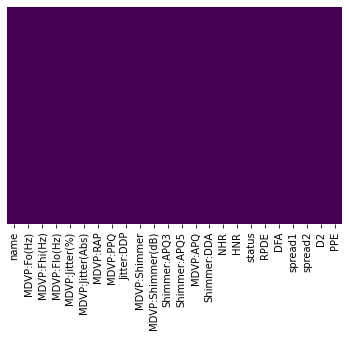

In [14]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
#overview of data
Data.describe().transpose()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [17]:
#A Skewness value of 0 in the output denotes a symmetrical distribution
#A negative Skewness value in the output denotes tail is larger towrds left hand side of data so we can say left skewed
#A Positive Skewness value in the output denotes tail is larger towrds Right hand side of data so we can say Right skewed
Data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

### Data Uderstanding
 <p>1.There is NO MISSING data.</p>
 <p>2.The feature 'name' does not add any information, there is no realationship between 'name' and 'status', We can remove this row.</p>
 <p>3.All features are numerical.</p>
 <p>4.There is lots of variation in units of data, gap between features values is very high, need to scale it.</p>
 <p>5.Most of the features are Skewed.</p>

### <font color='red'>Task 3: </font> Using univariate & bivariate analysis to check the individual attributes for their basic statistics

#### <font color='green'>Univariate analysis</font> 

Text(0.5, 1.0, 'Minimum vocal fundamental frequency')

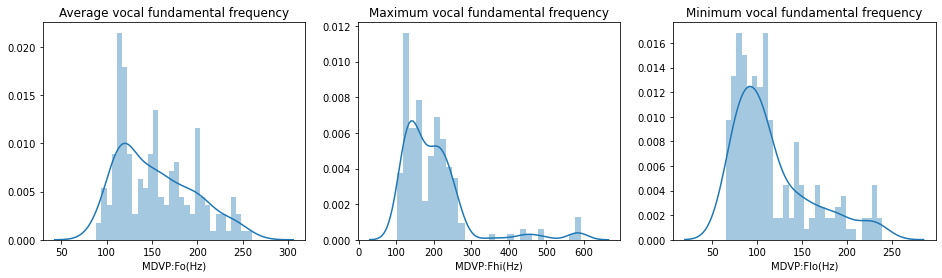

In [18]:
#Univariate analysis of Fundamental frequency
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.distplot(Data['MDVP:Fo(Hz)'],bins=30,ax=axes[0])
sns.distplot(Data['MDVP:Fhi(Hz)'],bins=30,ax=axes[1])
sns.distplot(Data['MDVP:Flo(Hz)'],bins=30,ax=axes[2])
axes[0].set_title('Average vocal fundamental frequency')
axes[1].set_title('Maximum vocal fundamental frequency')
axes[2].set_title('Minimum vocal fundamental frequency')

#### Observations
<p>The Average vocal fundamental frequency is almost normally distributed with more values ranging 115Hz and 130Hz. </p>
<p>The Maximum vocal fundamental frequency is a positive skewness with more values ranging 100Hz and 250Hz. </p>
<p>The Minimum vocal fundamental frequency is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz. </p>

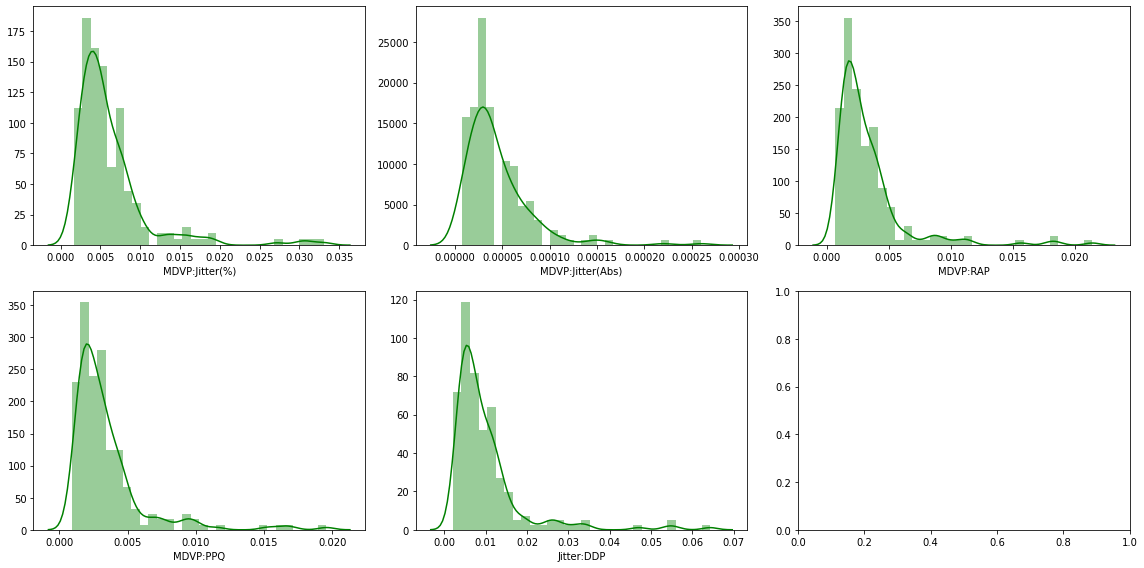

In [19]:
#Univariate analysis of measures of variation in fundamental frequency
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
sns.distplot(Data['MDVP:Jitter(%)'],bins=30,ax=axes[0,0],color='green')
sns.distplot(Data['MDVP:Jitter(Abs)'],bins=30,ax=axes[0,1],color='green')
sns.distplot(Data['MDVP:RAP'],bins=30,ax=axes[0,2],color='green')

sns.distplot(Data['MDVP:PPQ'],bins=30,ax=axes[1,0],color='green')
sns.distplot(Data['Jitter:DDP'],bins=30,ax=axes[1,1],color='green')
#sns.distplot(Data['Shimmer:DDA'],bins=30,ax=axes[1,2])
fig.tight_layout()

#### Observation
<p>From the above graphs, we can observe that all graphs have almost same distribution,and each graph is positively skewed </p>

<AxesSubplot:xlabel='Shimmer:DDA'>

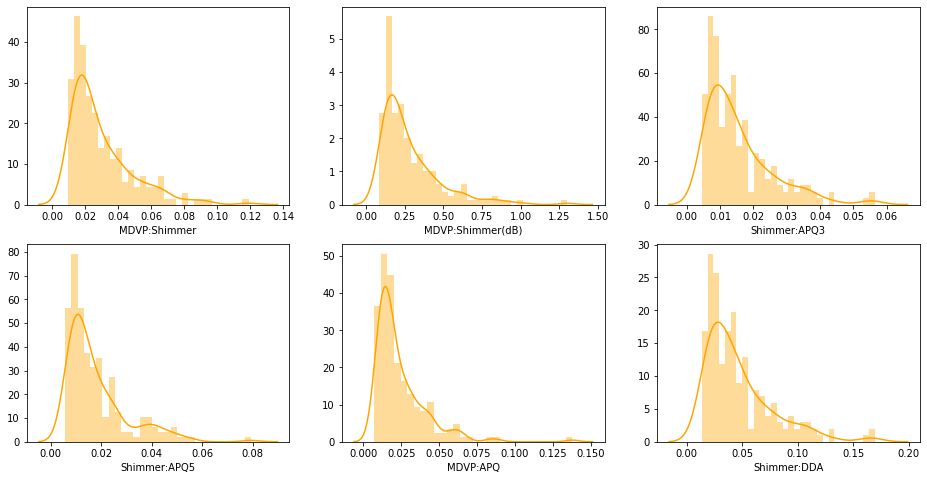

In [20]:
#Univariate analysis of  variation in amplitude
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
sns.distplot(Data['MDVP:Shimmer'],bins=30,ax=axes[0,0],color='orange')
sns.distplot(Data['MDVP:Shimmer(dB)'],bins=30,ax=axes[0,1],color='orange')
sns.distplot(Data['Shimmer:APQ3'],bins=30,ax=axes[0,2],color='orange')

sns.distplot(Data['Shimmer:APQ5'],bins=30,ax=axes[1,0],color='orange')
sns.distplot(Data['MDVP:APQ'],bins=30,ax=axes[1,1],color='orange')
sns.distplot(Data['Shimmer:DDA'],bins=30,ax=axes[1,2],color='orange')


#### Observation
<p>From the above graphs, we can observe that all graphs have almost same distribution,and each graph is positively skewed </p>

<AxesSubplot:xlabel='HNR'>

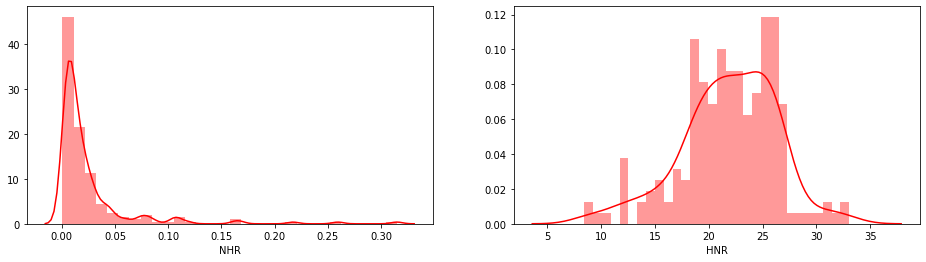

In [21]:
#analysis for measures of ratio of noise to tonal components in the voice
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(Data['NHR'],bins=30,ax=axes[0],color='red')
sns.distplot(Data['HNR'],bins=30,ax=axes[1],color='red')


#### Observation
<p>NHR is right skewed, most of the values lies aroung 0.00 to 0.04, so all values are very small.</p>
<p>The value HNR seems to be a slight negative skewness</p>

<AxesSubplot:xlabel='D2'>

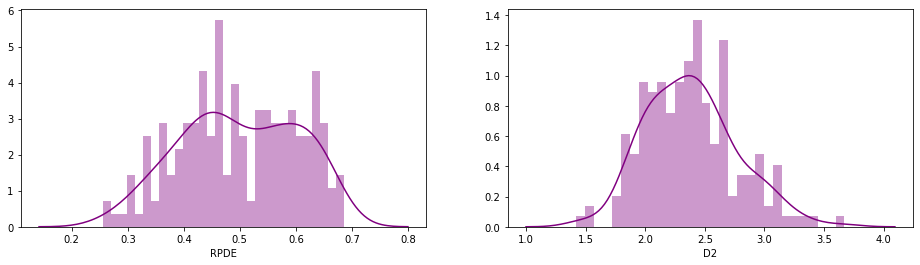

In [22]:
#analysis for wo nonlinear dynamical complexity measures
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(Data['RPDE'],bins=30,ax=axes[0],color='purple')
sns.distplot(Data['D2'],bins=30,ax=axes[1],color='purple')

#### Observation
<p>Both RPDE and D2 tends to be normalised graph</p>

<AxesSubplot:xlabel='PPE'>

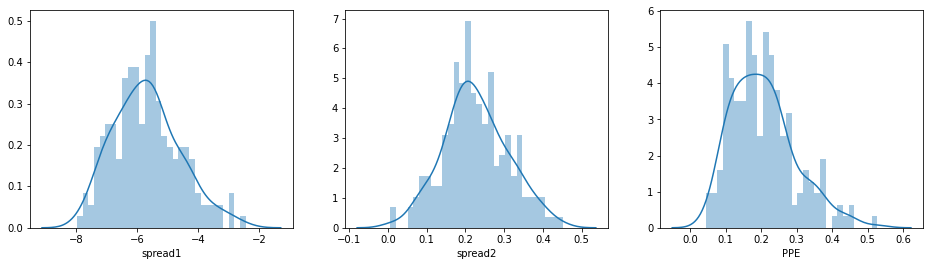

In [23]:
#Univariate analysis of nonlinear measures of fundamental frequency variation 
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.distplot(Data['spread1'],bins=30,ax=axes[0])
sns.distplot(Data['spread2'],bins=30,ax=axes[1])
sns.distplot(Data['PPE'],bins=30,ax=axes[2])

#### Observation
<p>All graphs tends to be normalised graph with few outliers</p>

<AxesSubplot:xlabel='status', ylabel='count'>

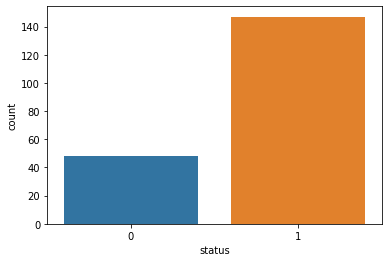

In [24]:
#Variation of traget variables
sns.countplot(x=Data['status'])

#### Observation
<p>More People(75%) have Parkinson then people not having Parkinson as per given dataset</p>

#### <font color='green'>Bi-variate analysis</font> 
<p> It would take lots of graphs and time to plot each graph with relation to target variable, so let's first find the most co-related columns and then do bi-vaiate analysis of those columns</p>

In [25]:
corr = Data.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


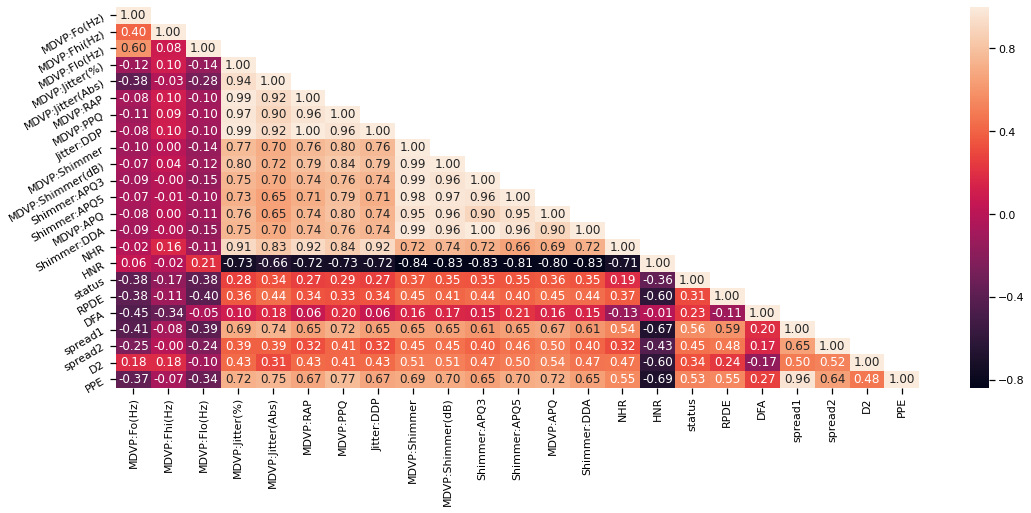

In [26]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#### Observation
<p>MDVP:Jitter(%) have high correlation i.e. above +90% value with Jitter(Abs),MDVP:RAP,MDVP:PPQ,NHR </p>
<p>HNR have High correlation i.e. above -80% with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA </p>
<p>MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA </p>
<p> These Realtion may be coz they are derived from each other </p>
<p>The target variable status has a weak positive corelation with spread1</p>

Text(0.5, 1.0, 'Variation of Spread1 with Status')

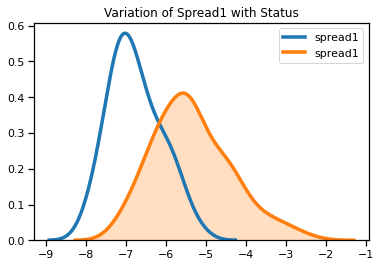

In [27]:
#variation of Spread1 with Target Variable
sns.kdeplot(Data[Data.status == 0]['spread1'], shade=False,)
sns.kdeplot(Data[Data.status == 1]['spread1'], shade=True)
plt.title("Variation of Spread1 with Status")

#### Observation
<p> People whose spread1 is between -6.5 and -5 have more chances of having Parkinson</p>
<p> People whose spread1 is between -9.5 and -7.5 have more chances of not having Parkinson</p>


<AxesSubplot:xlabel='status', ylabel='HNR'>

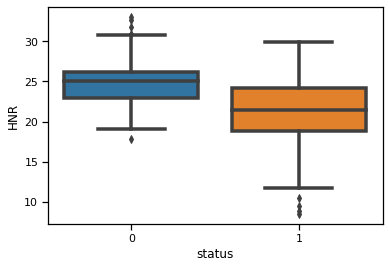

In [28]:
#variation of HNR with Target Variable, will not consider MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA as they are highly correlatedwith NHR 
sns.boxplot(x='status',y='HNR',data=Data)

#### Observation
<p> People who have Parkinson have higher levels of noise to tonal components in the voice.</p>

<AxesSubplot:>

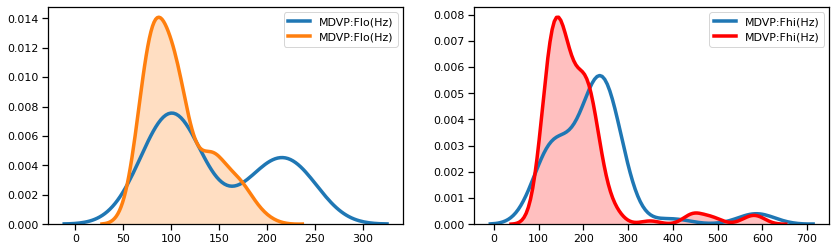

In [29]:
#variation of  Maximum, Minimum vocal fundamental frequency
fig, ax = plt.subplots(1,2,figsize=(14,4))
sns.kdeplot(Data[Data.status == 0]['MDVP:Flo(Hz)'], shade=False,ax=ax[0])
sns.kdeplot(Data[Data.status == 1]['MDVP:Flo(Hz)'], shade=True,ax=ax[0])

sns.kdeplot(Data[Data.status == 0]['MDVP:Fhi(Hz)'], shade=False,ax=ax[1])
sns.kdeplot(Data[Data.status == 1]['MDVP:Fhi(Hz)'], shade=True,color='r',ax=ax[1])

#### Observation
<p> People with Minimum vocal fundamental frequency above 250 give more evidence of not having Parkinson </p>
<p> People with Maximum vocal fundamental frequency from 100-200 give more evidence of having Parkinson </p>

<AxesSubplot:xlabel='status', ylabel='MDVP:Jitter(%)'>

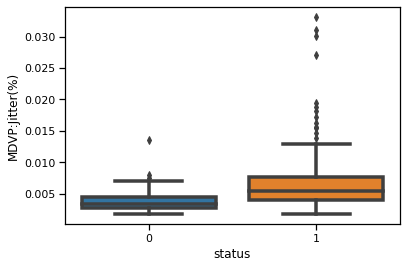

In [30]:
#variation of MDVP:Jitter(%) with Target Variable, will not consider Jitter(Abs),MDVP:RAP,MDVP:PPQ,NHR as they are highly correlatedwith NHR 
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=Data)

Text(0.5, 1.0, 'Variation of MDVP:Jitter(%) with Status')

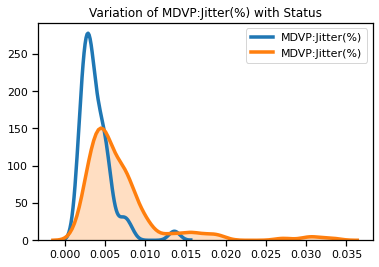

In [31]:
#variation of Spread1 with Target Variable
sns.kdeplot(Data[Data.status == 0]['MDVP:Jitter(%)'], shade=False,)
sns.kdeplot(Data[Data.status == 1]['MDVP:Jitter(%)'], shade=True)
plt.title("Variation of MDVP:Jitter(%) with Status")

#### Observation
<p> if MDVP:jitter(%) value is >0.005 more likely are the chances of having Parkinson. </p>

### <font color='red'>Task 4: </font> Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [32]:
#Split the data into training and test set in the ratio of 70:30 respectively
X = Data.drop(['status','name'],axis=1)
y = Data['status']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# checking the dimensions of the train & test subset
# to print dimension of train set
print(X_train.shape)
# to print dimension of test set
print(X_test.shape)

(136, 22)
(59, 22)


### <font color='red'>Task 5: </font> Prepare the data for training

In [33]:
#checking the variance 
#high variance means fearure does not affect the target variable
X_train.var()

MDVP:Fo(Hz)         1.744818e+03
MDVP:Fhi(Hz)        7.726066e+03
MDVP:Flo(Hz)        2.018009e+03
MDVP:Jitter(%)      2.117029e-05
MDVP:Jitter(Abs)    1.233427e-09
MDVP:RAP            8.129439e-06
MDVP:PPQ            6.477595e-06
Jitter:DDP          7.317514e-05
MDVP:Shimmer        3.075943e-04
MDVP:Shimmer(dB)    3.001363e-02
Shimmer:APQ3        9.606286e-05
Shimmer:APQ5        1.202009e-04
MDVP:APQ            1.953454e-04
Shimmer:DDA         8.645573e-04
NHR                 1.602961e-03
HNR                 1.737357e+01
RPDE                1.052263e-02
DFA                 3.032206e-03
spread1             1.090529e+00
spread2             5.837355e-03
D2                  1.197875e-01
PPE                 7.620135e-03
dtype: float64

In [34]:
#dropping correlated values which are have either more then 80% or less then -80%
X_train.drop(['MDVP:Shimmer','MDVP:Jitter(%)','HNR'],axis=1,inplace=True)
X_test.drop(['MDVP:Shimmer','MDVP:Jitter(%)','HNR'],axis=1,inplace=True)

In [35]:
#since there is lots of variety in the units of features let's scale it
scaler=StandardScaler().fit(X_train)
scaler_x_train=scaler.transform(X_train)

scaler=StandardScaler().fit(X_test)
scaler_x_test=scaler.transform(X_test)


### <font color='red'>Task 6: </font> Training with standard classification algorithms

### <font color='green'>A. Logistic Regression</font>

In [36]:
# Train and Fit model
model = LogisticRegression(random_state=0)
model.fit(scaler_x_train, y_train)

LogisticRegression(random_state=0)

In [37]:
#predict the Personal Loan Values
y_Logit_pred = model.predict(scaler_x_test)
y_Logit_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [38]:
# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(y_test,y_Logit_pred))

confusion_matrix
[[ 7  5]
 [ 7 40]]


In [39]:
# And some other metrics for Test
cr=classification_report(y_test, y_Logit_pred, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.89      0.85      0.87        47

    accuracy                           0.80        59
   macro avg       0.69      0.72      0.70        59
weighted avg       0.81      0.80      0.80        59



#### Model Scoring
<p>1. Accuracy :: 80% </p>
<p>2. Re-call ::  85%</p>
<p>3. Precision :: 89% </p>
<p>4. F1-Score :: 87%</p>
<p> Ratio in target variable is 75% to 25% so we will take f1-score i.e. <b>87%</b> as our scoring method

### <font color='green'>B. KNN</font>

In [40]:
# creating odd list of K for KNN
myList = list(range(3,40,2))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 3,5....29
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaler_x_train, y_train)
    # predict the response
    y_pred = knn.predict(scaler_x_test)
    # evaluate F1 Score
    scores = f1_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 29


In [41]:
# instantiate learning model (k = 29)
knn = KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')
# fitting the model
knn.fit(scaler_x_train, y_train)

# predict the response
y_Knn_pred = knn.predict(scaler_x_test)

# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(y_test,y_Knn_pred))


confusion_matrix
[[ 5  7]
 [ 0 47]]


In [42]:
# evaluate Model Score
print(classification_report(y_test, y_Knn_pred, digits=2))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.87      1.00      0.93        47

    accuracy                           0.88        59
   macro avg       0.94      0.71      0.76        59
weighted avg       0.90      0.88      0.86        59



#### Model Scoring
<p>1. Accuracy :: 88% </p>
<p>2. Re-call ::  100%</p>
<p>3. Precision :: 87% </p>
<p>4. F1-Score :: 93%</p>
<p> Ratio in target variable is 75% to 25% so we will take f1-score i.e. <b>93%</b> as our scoring method

### <font color='green'>C. SVM Algorithm</font>

In [43]:
clf = SVC(gamma=0.05, C=3,random_state=0)
clf.fit(scaler_x_train , y_train)

# predict the response
prediction_SVC = clf.predict(scaler_x_test)

# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(y_test,prediction_SVC))


confusion_matrix
[[ 8  4]
 [ 2 45]]


In [44]:
# evaluate Model Score
print(classification_report(y_test, prediction_SVC, digits=2))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.96      0.94        47

    accuracy                           0.90        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.89      0.90      0.89        59



#### Model Scoring
<p>1. Accuracy :: 90% </p>
<p>2. Re-call ::  96%</p>
<p>3. Precision :: 92% </p>
<p>4. F1-Score :: 94%</p>
<p> Ratio in target variable is 75% to 25% so we will take f1-score i.e. <b>94%</b> as our scoring method

#### Determining which standard model performed better

In [70]:
#Using K fold to check how my algorighm varies throughout my data if we split it in 10 equal bins
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=3)))

# evaluate each model
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, scaler_x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print("Name = %s , Mean F1-Score = %f, SD F1-Score = %f" % (name, cv_results.mean(), cv_results.std()))

Name = Logistic Regression , Mean F1-Score = 0.897786, SD F1-Score = 0.064547
Name = K-NN , Mean F1-Score = 0.895384, SD F1-Score = 0.086206
Name = SVM , Mean F1-Score = 0.912111, SD F1-Score = 0.070824


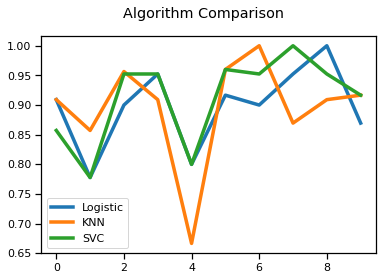

In [71]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.plot(results[0],label='Logistic')
plt.plot(results[1],label='KNN')
plt.plot(results[2],label='SVC')
plt.legend()
plt.show()

### <font color='green'>Conclusion</font>
<p>After compairing Logistic,KNN,SVC algo we can conclude that <b>SVC performed slightly better</b></p>


### <font color='red'>Task 7: </font> Training Meta Classifier

### <font color='green'>Stacking</font>

In [47]:
#Stacking the idea of stacking is to learn several different weak learners
# and combine them by training a meta-model to output predictions based on the multiple predictions
# returned by these weak models. So, we need to define two things in order to build our stacking model:
# the L learners we want to fit and the meta-model that combines them.

# defining level hetrogenious model
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC(gamma=0.05, C=3)))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = SVC(gamma=0.05, C=3)

# define the stacking ensemble with cross validation of 5
Stack_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)


In [48]:
# predict the response
Stack_model.fit(scaler_x_train, y_train)
prediction_Stack = Stack_model.predict(scaler_x_test)

In [49]:

# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(y_test,prediction_Stack))


confusion_matrix
[[ 8  4]
 [ 2 45]]


In [50]:
# evaluate Model Score
print(classification_report(y_test, prediction_Stack, digits=2))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.96      0.94        47

    accuracy                           0.90        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.89      0.90      0.89        59



#### AUC-ROC for stacking

In [51]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction_Stack)
roc_auc_stack = metrics.auc(fpr, tpr)
# print AUC
print("AUC : % 1.4f" %(roc_auc_stack)) 

AUC :  0.8121


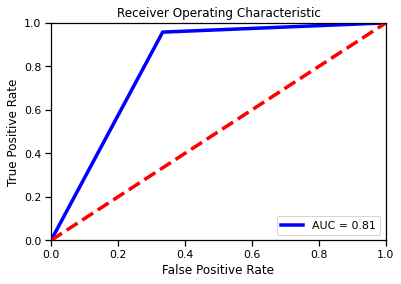

In [52]:
#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_stack)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Model Scoring
<p>1. Accuracy :: 90% </p>
<p>2. Re-call ::  96%</p>
<p>3. Precision :: 92% </p>
<p>4. F1-Score :: 94%</p>
<p> Ratio in target variable is 75% to 25% so we will take f1-score i.e. <b>94%</b> as our scoring method </p>
<p> ROC-AUC : <b>81%</b> </p>

### <font color='red'>Task 8: </font> Standard Ensemble model
### <font color='green'>Random Forest</font>

In [53]:
#creating model of Random Forest
RandomForest = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10)
RandomForest = RandomForest.fit(scaler_x_train, y_train)

# predict the response
RandomForest_pred = RandomForest.predict(scaler_x_test)


In [54]:

# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(y_test,RandomForest_pred))


confusion_matrix
[[ 8  4]
 [ 4 43]]


In [55]:
# evaluate Model Score
print(classification_report(y_test, RandomForest_pred, digits=2))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.91      0.91      0.91        47

    accuracy                           0.86        59
   macro avg       0.79      0.79      0.79        59
weighted avg       0.86      0.86      0.86        59



#### AUC-ROC for Random Forest

In [56]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, RandomForest_pred)
roc_auc_rf = metrics.auc(fpr, tpr)
# print AUC
print("AUC : % 1.4f" %(roc_auc_rf)) 

AUC :  0.7908


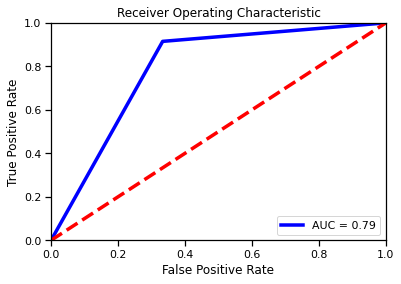

In [57]:
#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Model Scoring
<p>1. Accuracy :: 86% </p>
<p>2. Re-call ::  91%</p>
<p>3. Precision :: 91% </p>
<p>4. F1-Score :: 91%</p>
<p> Ratio in target variable is 75% to 25% so we will take f1-score i.e. <b>91%</b> as our scoring method </p>
<p> ROC-AUC : <b>79%</b> </p>

In [58]:
# Lets check features importance
feature_imp = pd.Series(RandomForest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

PPE                 0.150175
spread1             0.142616
Shimmer:APQ5        0.120526
MDVP:Fo(Hz)         0.086395
D2                  0.074096
MDVP:APQ            0.062591
Shimmer:APQ3        0.040966
MDVP:Fhi(Hz)        0.040326
Shimmer:DDA         0.040246
MDVP:Flo(Hz)        0.036475
spread2             0.032434
NHR                 0.027862
MDVP:Shimmer(dB)    0.026582
DFA                 0.024529
MDVP:RAP            0.022536
MDVP:PPQ            0.021325
RPDE                0.018827
Jitter:DDP          0.016947
MDVP:Jitter(Abs)    0.014547
dtype: float64

Text(0, 0.5, 'Features')

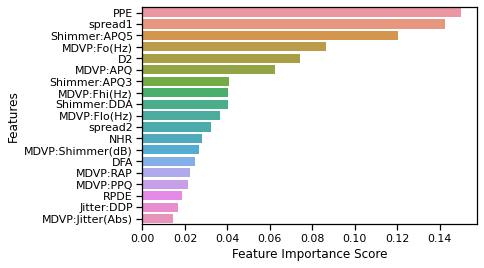

In [59]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

### <font color='green'>Adaptive Boosting</font>

In [60]:
#create and fit the model
AdBs = AdaBoostClassifier( n_estimators= 50)
AdBs  = AdBs.fit(scaler_x_train, y_train)

# predict the response
AdBs_pred = AdBs.predict(scaler_x_test)


In [61]:
# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(y_test,AdBs_pred))


confusion_matrix
[[ 7  5]
 [ 2 45]]


In [62]:
# evaluate Model Score
print(classification_report(y_test, AdBs_pred, digits=2))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.90      0.96      0.93        47

    accuracy                           0.88        59
   macro avg       0.84      0.77      0.80        59
weighted avg       0.88      0.88      0.87        59



#### AUC-ROC for AdaBoost

In [63]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, AdBs_pred)
roc_auc_ada = metrics.auc(fpr, tpr)
# print AUC
print("AUC : % 1.4f" %(roc_auc_ada)) 

AUC :  0.7704


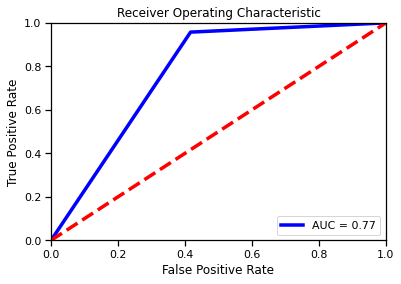

In [64]:
#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Model Scoring
<p>1. Accuracy :: 88% </p>
<p>2. Re-call ::  96%</p>
<p>3. Precision :: 90% </p>
<p>4. F1-Score :: 93%</p>
<p> Ratio in target variable is 75% to 25% so we will take f1-score i.e. <b>93%</b> as our scoring method </p>
<p> ROC-AUC : <b>77%</b> </p>

### <font color='red'>Task 9: </font> Compare all the models

In [68]:
#Using K fold to check how my algorighm varies throughout my data if we split it in 10 equal bins
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=3)))
models.append(('Stacking', StackingClassifier(estimators=level0, final_estimator=level1, cv=5)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10)))
models.append(('Adaptive Boosting', AdaBoostClassifier( n_estimators= 50)))

# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, scaler_x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print("Name = %s , Mean Accuracy = %f, SD Accuracy = %f" % (name, cv_results.mean(), cv_results.std()))

Name = Logistic Regression , Mean Accuracy = 0.853846, SD Accuracy = 0.079441
Name = K-NN , Mean Accuracy = 0.839011, SD Accuracy = 0.110467
Name = SVM , Mean Accuracy = 0.876374, SD Accuracy = 0.084524
Name = Stacking , Mean Accuracy = 0.906593, SD Accuracy = 0.090518
Name = Random Forest , Mean Accuracy = 0.920330, SD Accuracy = 0.074501
Name = Adaptive Boosting , Mean Accuracy = 0.890659, SD Accuracy = 0.065955


[Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'K-NN'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Stacking'),
 Text(5, 0, 'Random Forest'),
 Text(6, 0, 'Adaptive Boosting')]

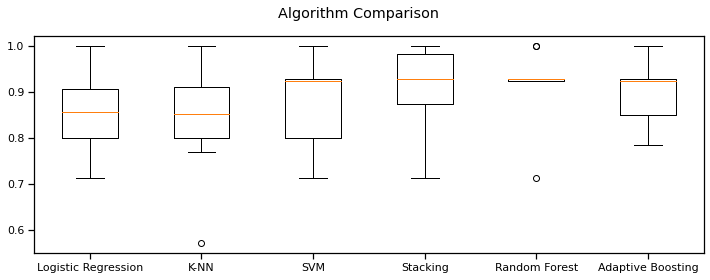

In [69]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)

#### Conclusion
<p>Random Forest Algro performs better in terms of overall performace. </p>
<p>Avarage Accuracy over data is 92% with Standard Deviation of 7% and F1-Score of 94% with Standard Deviation of 6%</p>

### END